In [4]:
import pandas as pd

In [5]:
veri = pd.read_csv('smartphones.csv')
print(veri.head())

  brand_name                    model   price  avg_rating  5G_or_not  \
0      apple          Apple iPhone 11   38999         7.3          0   
1      apple  Apple iPhone 11 (128GB)   46999         7.5          0   
2      apple  Apple iPhone 11 Pro Max  109900         7.7          0   
3      apple          Apple iPhone 12   51999         7.4          1   
4      apple  Apple iPhone 12 (128GB)   55999         7.5          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0             2.65            3110.0   
1          bionic        6.0             2.65            3110.0   
2          bionic        6.0             2.65            3500.0   
3          bionic        6.0             3.10               NaN   
4          bionic        6.0             3.10               NaN   

   fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
0                        0  ...               64          6.1            60   
1     

In [7]:
apple_modeller = veri[veri['brand_name'] == 'apple']
print(apple_modeller)

   brand_name                            model   price  avg_rating  5G_or_not  \
0       apple                  Apple iPhone 11   38999         7.3          0   
1       apple          Apple iPhone 11 (128GB)   46999         7.5          0   
2       apple          Apple iPhone 11 Pro Max  109900         7.7          0   
3       apple                  Apple iPhone 12   51999         7.4          1   
4       apple          Apple iPhone 12 (128GB)   55999         7.5          1   
5       apple          Apple iPhone 12 (256GB)   67999         7.6          1   
6       apple             Apple iPhone 12 Mini   40999         7.4          1   
7       apple     Apple iPhone 12 Mini (128GB)   45999         7.5          1   
8       apple     Apple iPhone 12 Mini (256GB)   55999         7.5          1   
9       apple      Apple iPhone 12 Pro (256GB)  119900         8.0          1   
10      apple      Apple iPhone 12 Pro (512GB)  139900         8.0          1   
11      apple               

In [63]:
boyut = veri.shape
print(f"Veri Tablosunun Boyutu: {boyut[0]} satır")

Veri Tablosunun Boyutu: 941 satır


In [73]:
benzersiz_markalar = veri['brand_name'].unique()
print(benzersiz_markalar)

['apple' 'asus' 'blackview' 'blu' 'cat' 'cola' 'doogee' 'duoqin' 'gionee'
 'google' 'honor' 'huawei' 'ikall' 'infinix' 'iqoo' 'itel' 'jio' 'lava'
 'leeco' 'leitz' 'lenovo' 'letv' 'lg' 'lyf' 'micromax' 'motorola' 'nokia'
 'nothing' 'oneplus' 'oppo' 'oukitel' 'poco' 'realme' 'redmi' 'royole'
 'samsung' 'sharp' 'sony' 'tcl' 'tesla' 'vertu' 'vivo' 'xiaomi' 'zte']


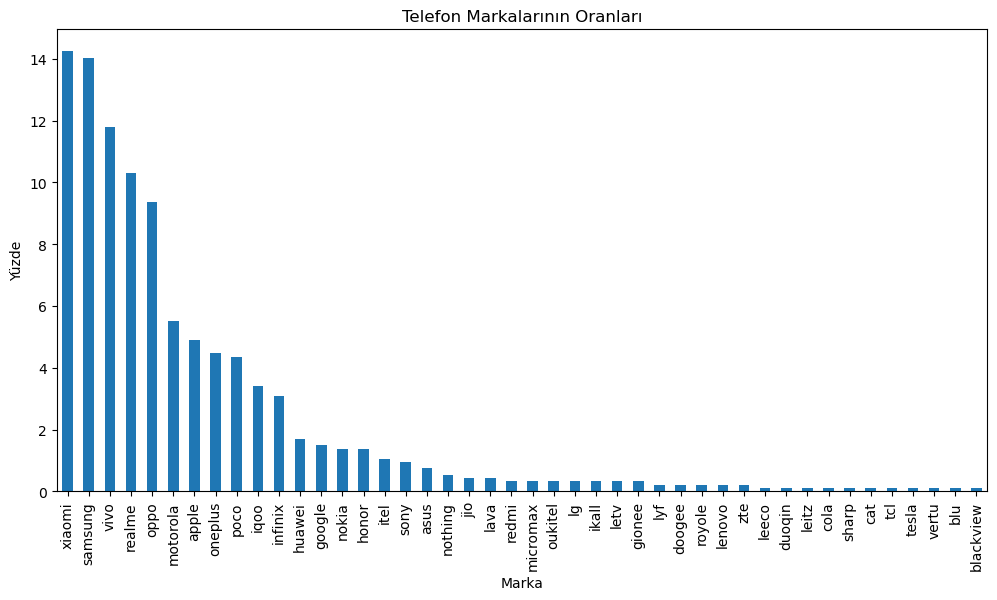

In [11]:
import matplotlib.pyplot as plt

telefon_sayilari = veri['brand_name'].value_counts()

toplam_telefon_sayisi = len(veri)

oranlar = (telefon_sayilari / toplam_telefon_sayisi) * 100

plt.figure(figsize=(12, 6))
oranlar.plot(kind='bar')
plt.title('Telefon Markalarının Oranları')
plt.xlabel('Marka')
plt.ylabel('Yüzde')
plt.show()

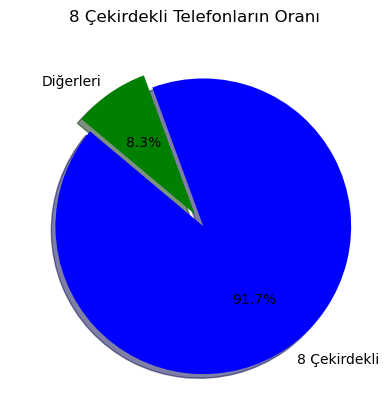

In [13]:
sekiz_coreli = veri[veri['num_cores'] == 8]

digertelefonlar = veri[veri['num_cores'] != 8]

sekiz_coreli_sayısı = len(sekiz_coreli)
digertelefonlar_sayısı = len(digertelefonlar)

labels = ['8 Çekirdekli', 'Diğerleri']
sizes = [sekiz_coreli_sayısı, digertelefonlar_sayısı]
colors = ['blue', 'green']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('8 Çekirdekli Telefonların Oranı')
plt.show()

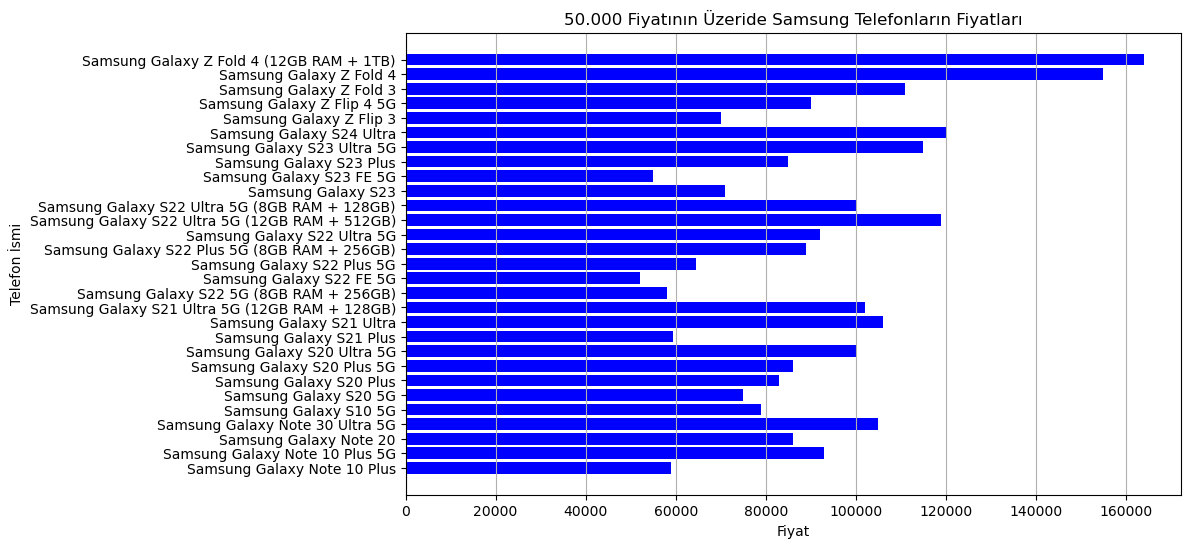

In [20]:
samsung_veri = veri[(veri['brand_name'] == 'samsung') & (veri['price'] > 50000)]

telefon_isimleri = samsung_veri['model']
fiyatlar = samsung_veri['price']

plt.figure(figsize=(10, 6))
plt.barh(telefon_isimleri, fiyatlar, color='blue')
plt.xlabel('Fiyat')
plt.ylabel('Telefon İsmi')
plt.title('50.000 Fiyatının Üzeride Samsung Telefonların Fiyatları')
plt.grid(axis='x')

plt.show()

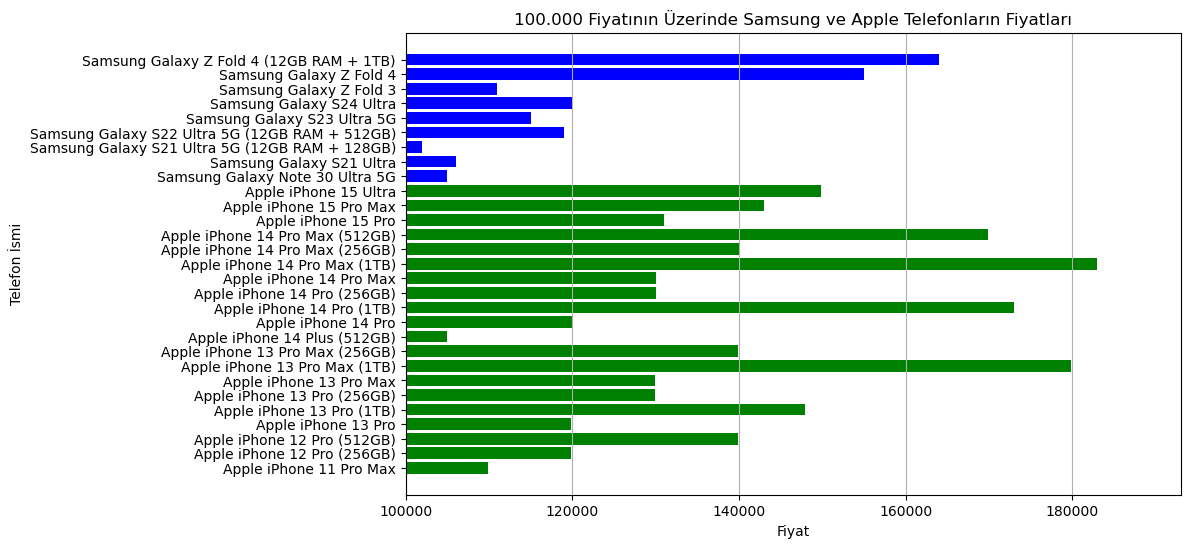

In [15]:
filtre = (veri['brand_name'].isin(['samsung', 'apple'])) & (veri['price'] > 100000)
filtrelenmis_veri = veri[filtre]

telefon_isimleri = filtrelenmis_veri['model']
fiyatlar = filtrelenmis_veri['price']
markalar = filtrelenmis_veri['brand_name']

plt.figure(figsize=(10, 6))
plt.barh(telefon_isimleri, fiyatlar, color=markalar.map({'samsung': 'blue', 'apple': 'green'}))
plt.xlabel('Fiyat')
plt.ylabel('Telefon İsmi')
plt.title('100.000 Fiyatının Üzerinde Samsung ve Apple Telefonların Fiyatları')
plt.grid(axis='x')

plt.xlim(100000, fiyatlar.max() + 10000)

plt.show()

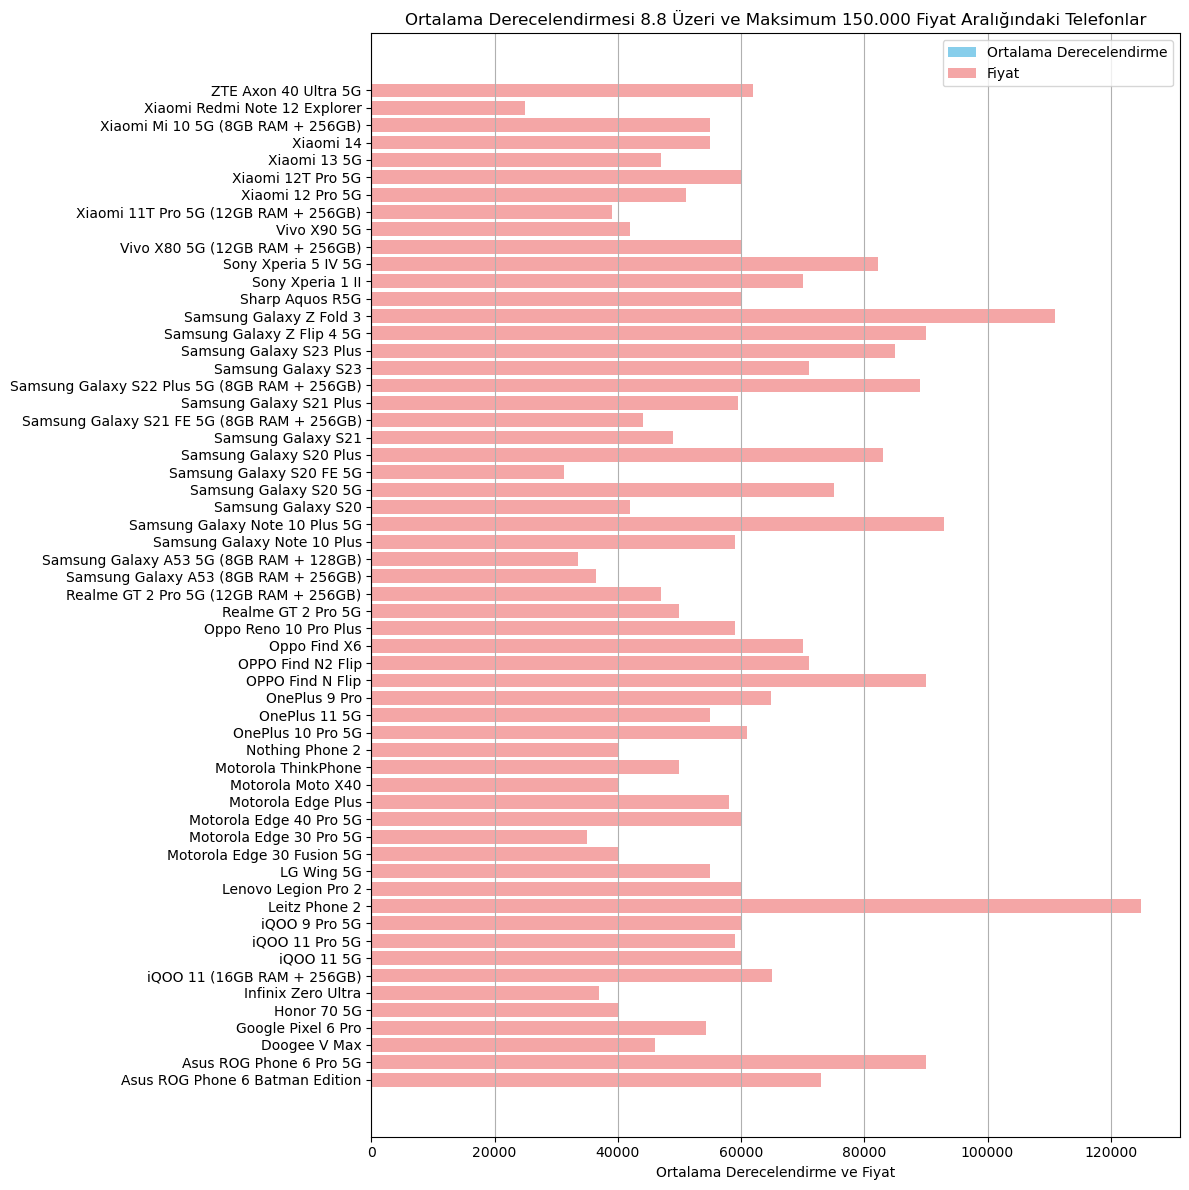

In [17]:
filtre_fiyat = (veri['price'] <= 150000)
veri_fiyat_filtrelenmis = veri[filtre_fiyat]

filtre_derece = (veri_fiyat_filtrelenmis['avg_rating'] >= 8.8)
veri_filtrelenmis = veri_fiyat_filtrelenmis[filtre_derece]

telefon_isimleri = veri_filtrelenmis['model']
ortalama_derecelendirme = veri_filtrelenmis['avg_rating']
fiyatlar = veri_filtrelenmis['price']

plt.figure(figsize=(12, 12))
plt.barh(telefon_isimleri, ortalama_derecelendirme, color='skyblue', label='Ortalama Derecelendirme')
plt.barh(telefon_isimleri, fiyatlar, color='lightcoral', label='Fiyat', alpha=0.7)
plt.xlabel('Ortalama Derecelendirme ve Fiyat')
plt.title('Ortalama Derecelendirmesi 8.8 Üzeri ve Maksimum 150.000 Fiyat Aralığındaki Telefonlar')
plt.legend(loc='upper right')
plt.grid(axis='x')

# Grafiği göster
plt.tight_layout()
plt.show()

In [36]:
oran = veri['processor_speed'].mean()

print(f"Ortalama İşlemci Hızı Oranı: {oran:.2f}")

Ortalama İşlemci Hızı Oranı: 2.43


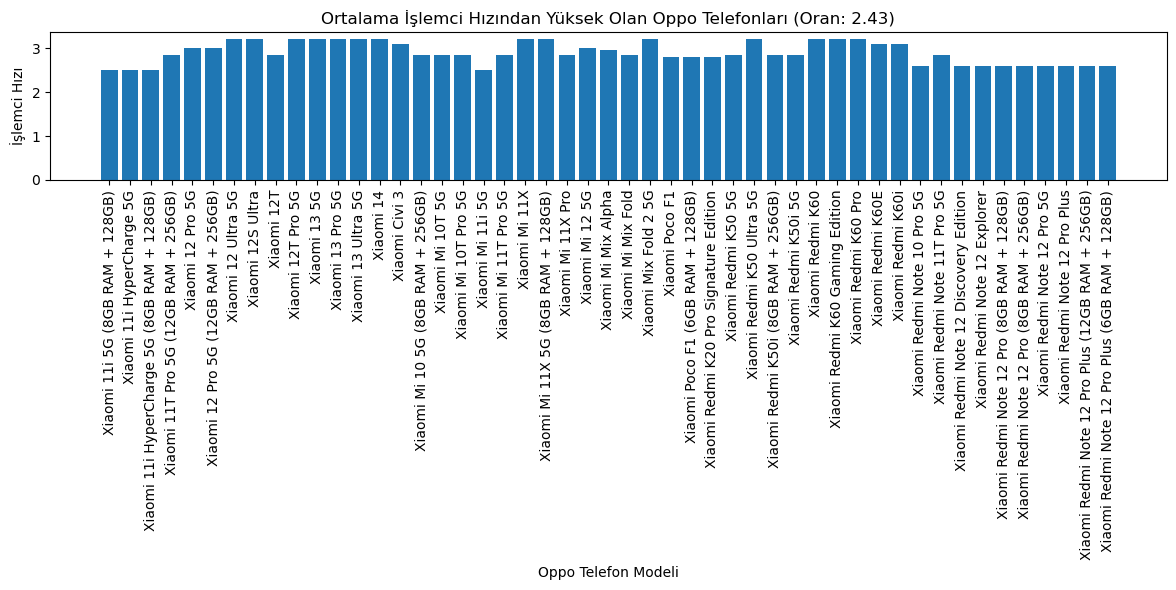

In [71]:
ust_oranli_oppo_telefonlar = veri[(veri['processor_speed'] > oran) & (veri['brand_name'] == 'xiaomi')]

plt.figure(figsize=(12, 6))
plt.bar(ust_oranli_oppo_telefonlar['model'], ust_oranli_oppo_telefonlar['processor_speed'])
plt.xlabel('Oppo Telefon Modeli')
plt.ylabel('İşlemci Hızı')
plt.title(f'Ortalama İşlemci Hızından Yüksek Olan Oppo Telefonları (Oran: {oran:.2f})')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()